# Assignment 1 - Part 1(MNIST) - Deep learning(E533)

# IU ID -navmarri@iu.edu
# Name - Naveen Marri

### Importing required libraries

In [1]:

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

### Setting the cuda settings

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

## 1.1 Training and testing the model

In [3]:
# Import MNIST data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Training Parameters
learning_rate = 0.001
num_steps = 10000
batch_size = 128

# Network Parameters
num_input = 784 
num_classes = 10
n_params = 1024


# tensorflow palce holders
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])

#normalizing the input
X = X / 255

#fully connected layers
first_layer = tf.layers.dense(X, n_params, activation=tf.nn.relu, 
                              kernel_initializer=tf.keras.initializers.he_normal())

second_layer = tf.layers.dense(first_layer, n_params, activation = tf.nn.relu,
                              kernel_initializer=tf.keras.initializers.he_normal())

third_layer = tf.layers.dense(second_layer, n_params, activation = tf.nn.relu,
                             kernel_initializer=tf.keras.initializers.he_normal())

fourth_layer = tf.layers.dense(third_layer, n_params, activation = tf.nn.relu,
                              kernel_initializer=tf.keras.initializers.he_normal())

fifth_layer = tf.layers.dense(fourth_layer, n_params, activation = tf.nn.relu,
                             kernel_initializer=tf.keras.initializers.he_normal())

logits = tf.layers.dense(fifth_layer,num_classes)

#computing softmax on the output
prediction = tf.nn.softmax(logits)

# Using cross entropy loss function
loss_op = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                         labels = Y)

#adam optimizier as the optimization function
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

#extract the correct predictions and compute the accuracy
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#initialize all the variables
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(0, num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        
    print("Training is completed")
    batch_size = 50
    batch_num = int(mnist.test.num_examples / batch_size)
    test_accuracy = 0

    for i in range(batch_num):
        batch = mnist.test.next_batch(batch_size)
        test_accuracy += accuracy.eval(feed_dict={X: batch[0],
                                                  Y: batch[1]})

    test_accuracy /= batch_num
    print("test accuracy %g"%test_accuracy)
    
    
    #extracting the intermediate layers as numpy arrays
    first_layer , \
    second_layer,third_layer,\
    fourth_layer, fifth_layer,test_thousand_pred,accuracy_thousand = sess.run([first_layer, 
                                                                               second_layer,
                                                                               third_layer,
                                                                               fourth_layer,
                                                                             fifth_layer, prediction, accuracy], 
                                                   feed_dict = {X: mnist.test.images[0:1000],
                                                                Y: mnist.test.labels[0:1000]})
    
    #test accuracy on 1000 test images
    print("Testing accuracy on 1000 images:"+str(accuracy_thousand))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Training is completed
test accuracy 0.9809
Testing accuracy on 1000 images:0.979


In [4]:
actual_labels = mnist.test.labels[:1000]
pred_out_label = np.argmax(test_thousand_pred, axis = 1)
pred_out_value = np.amax(test_thousand_pred, axis = 1)

In [5]:
images = []
labels = []
for i in range(0, 10):
    images.append(mnist.test.images[np.argpartition(test_thousand_pred[:,i], -10)[-10:]])
    labels.append(mnist.test.labels[np.argpartition(test_thousand_pred[:,0], -10)[-10:]])

## Helper function for plotting images of digits

In [6]:
img_shape = (28, 28)


def plot_images(images):
    
    # Create figure with 10x10 sub-plots.
    
    fig, axes = plt.subplots(10, 10)
    fig.set_size_inches(16, 10.5, forward=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    for i, ax in enumerate(axes.flat):
            ax.imshow(images[int(i / 10)][i % 10, :].reshape(img_shape), cmap='gray')
           # Show the classes as the label on the x-axis.
            ax.set_xlabel('')
            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])

    # in a single Notebook cell.
    plt.show()

## 1.3 plotting images with highest probability on the softmax layer

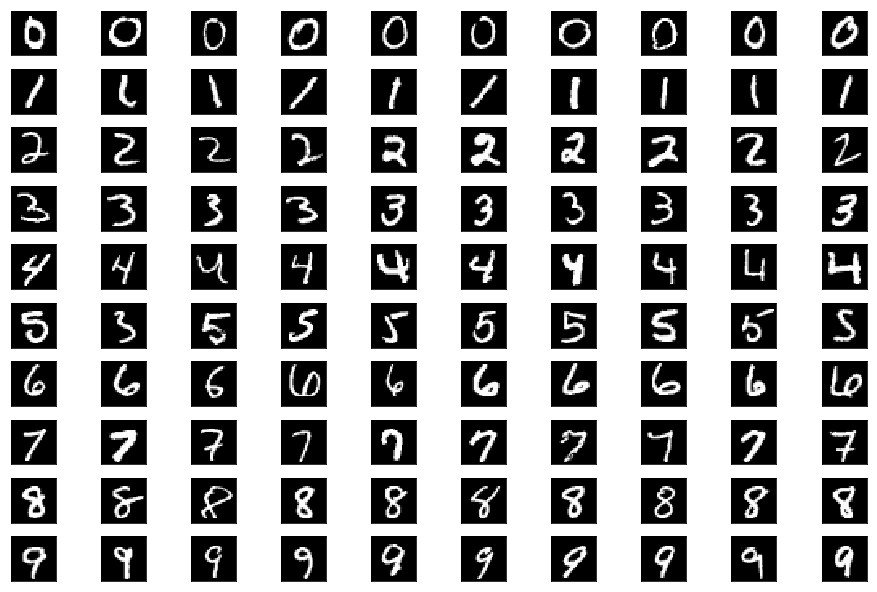

In [7]:
plot_images(images)

In [8]:
fifth_layer.shape
idx = np.random.randint(1024, size=10)
fifth_layer_random = fifth_layer[:, idx]
fifth_layer_random.shape

(1000, 10)

In [9]:
fifth_layer_list = fifth_layer_random.tolist()
fifth_layer_non_zero = fifth_layer_list
# for i in range(0, len(fifth_layer_list)):
#     if all(x==0 for x in fifth_layer_list[i]):
#         pass
#     else:
#         fifth_layer_non_zero.append(fifth_layer_list[i])
# print(len(fifth_layer_non_zero))

In [10]:
images_sparse = []
for i in range(0, 10):
    top_10 = np.argpartition(np.array(fifth_layer_non_zero)[:, i], -10)[-10:]
    for top in top_10:
        if fifth_layer_non_zero[top][i] == 0:
            images_sparse.append(np.zeros(784))
        else:
            images_sparse.append(mnist.test.images[top])

In [11]:
def plot_images_sparse(images):
    
    # Create figure with 10x10 sub-plots.
    
    fig, axes = plt.subplots(10, 10)
    fig.set_size_inches(16, 10.5, forward=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    for i, ax in enumerate(axes.flat):
            ax.imshow(images[i].reshape(img_shape), cmap='gray')
           # Show the classes as the label on the x-axis.
            ax.set_xlabel('')
            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])

    # in a single Notebook cell.
    plt.show()

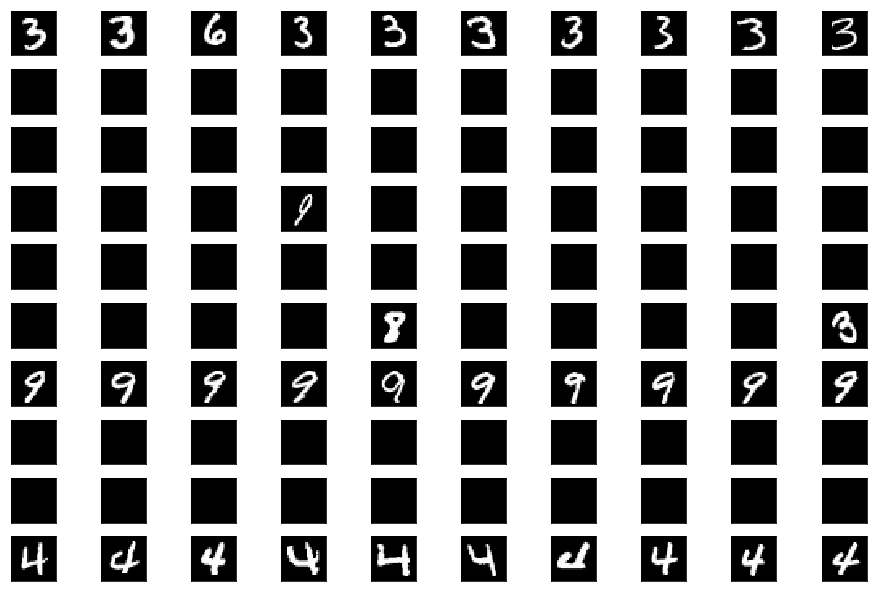

In [12]:
plot_images_sparse(images_sparse)

## Observation for  1.4 compared to 1.3 ?

## What do you see? What would have been the ideal situation for this second-tothe-last layer?

#### The results show that the nodes which are selected in random shows that only nodes which are activated for a particular label is showing the result and rest of the others are zero. This could be because of the number of dimensions we have i.e., 1024 dimensions 

In [13]:
inp_images = mnist.test.images[:1000]
out_labels = np.argmax(np.array(mnist.test.labels[:1000]), axis = 1)

## 1.5 Performing T-SNE and PCA on the input images

In [14]:
tsne_output = TSNE(n_components = 2).fit_transform(np.array(inp_images))

In [15]:
pca = PCA(n_components=2)
pca_output = pca.fit_transform(np.array(inp_images))

### Helper function for plotting the scatter plot

In [16]:
def plot_scatter(tsne_output, inp_images, out_labels):
    mean = []
    for i in range(0, 10):
        mean.append(tsne_output[np.where(out_labels == i)].mean(axis=0))

    target_ids = range(out_labels.shape[0])

    plt.figure(figsize=(20, 16))
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#0082c8', '#f58231', 
              '#911eb4', '#46f0f0', '#f032e6', '#d2f53c', '#fabebe']
    for i, label in enumerate(out_labels):
        plt.scatter(tsne_output[i][0], tsne_output[i][1], c=colors[label])
        
    # for plotting the mean at the center of the plot
    for i in range(0, 10):
        plt.annotate(''+str(i), xy=(mean[i][0], mean[i][1]), 
                     xytext=(mean[i][0], mean[i][1]),
                    fontsize = 20)
    plt.legend()
    plt.show()

### PCA plot for the input images

No handles with labels found to put in legend.


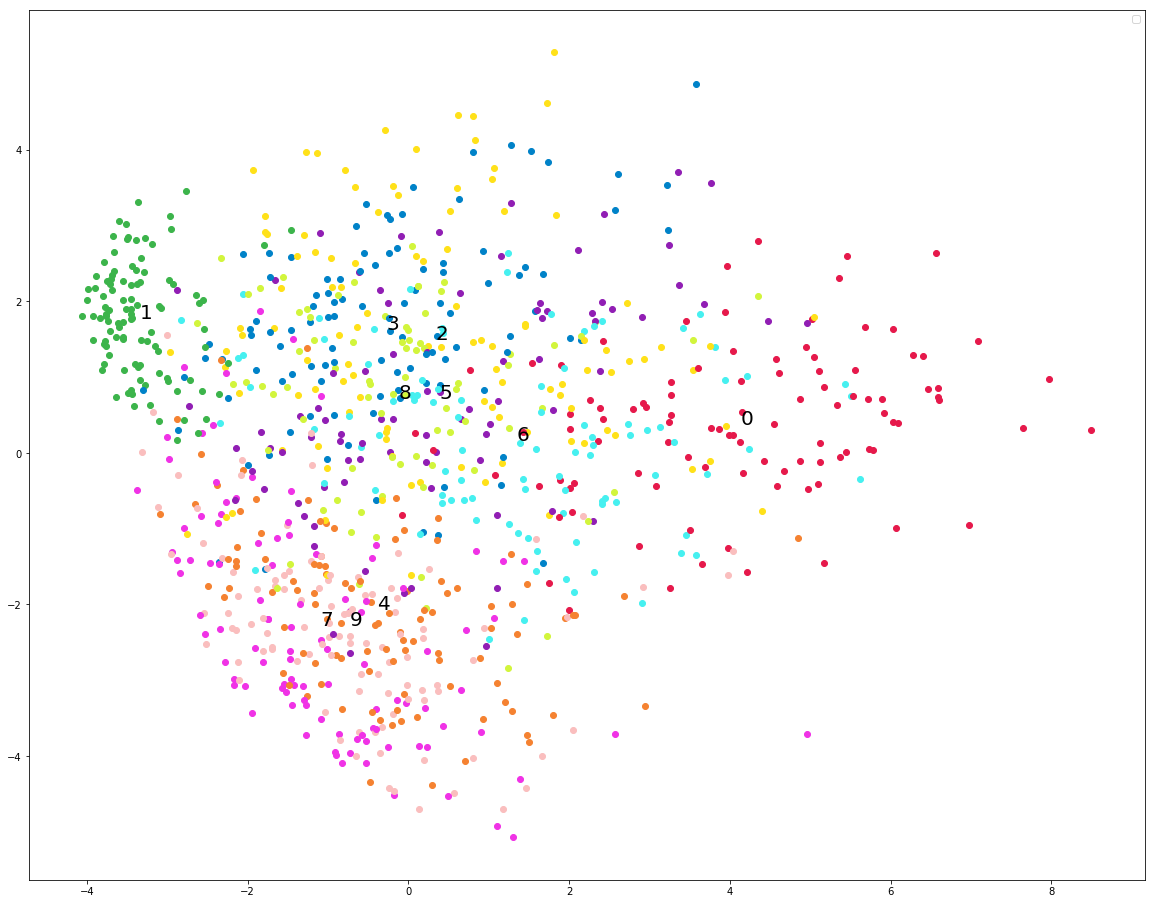

In [17]:
plot_scatter(pca_output, inp_images, out_labels)

### T-SNE on the input images

No handles with labels found to put in legend.


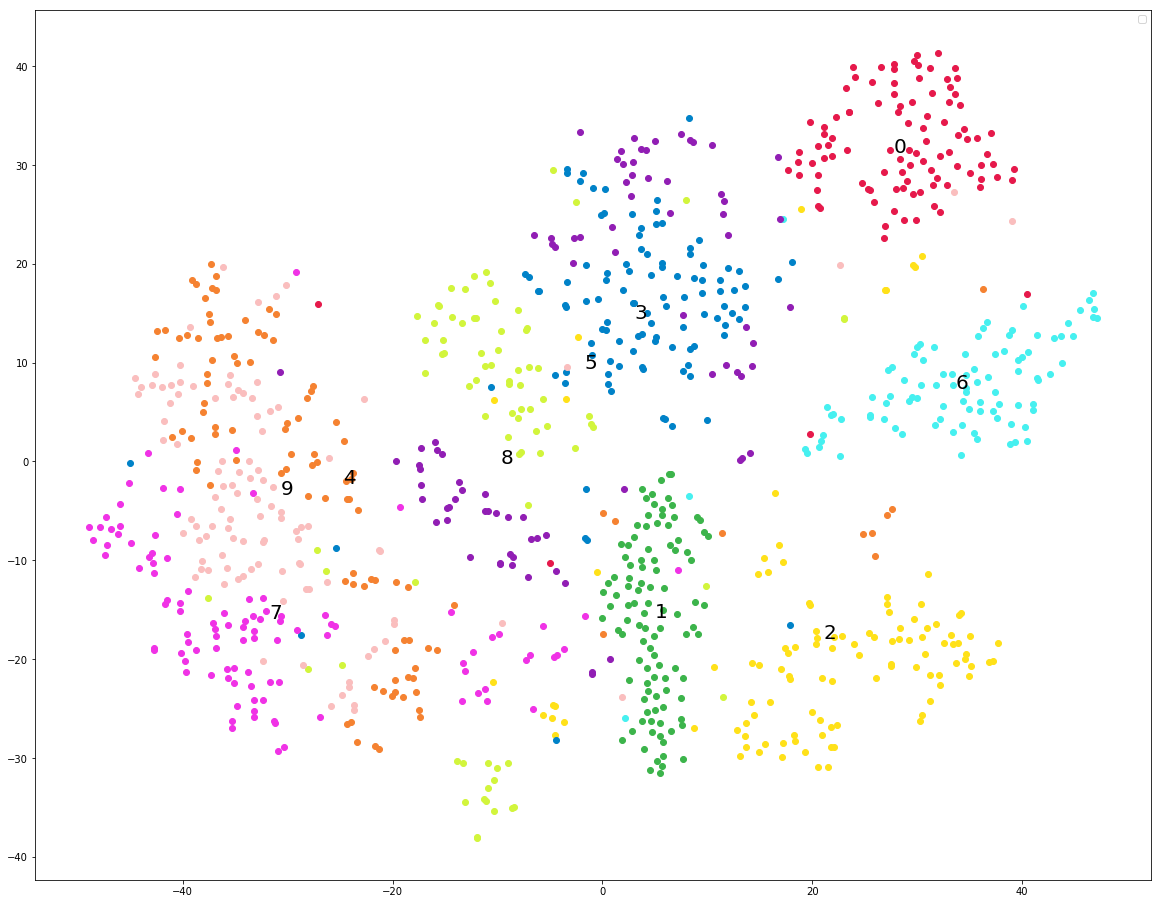

In [18]:
plot_scatter(tsne_output, inp_images, out_labels)

## Do you think it is easy to classify?

#### From the above plot it is clear that it is difficult to classify the data because all the labels are completely mixed up

### T-SNE on the all five layers which extracts two dimensions

In [19]:
tsne_first_layer_output = TSNE(n_components = 2).fit_transform(first_layer) 
tsne_second_layer_output = TSNE(n_components = 2).fit_transform(second_layer) 
tsne_third_layer_output = TSNE(n_components = 2).fit_transform(third_layer) 
tsne_fourth_layer_output = TSNE(n_components = 2).fit_transform(fourth_layer) 
tsne_fifth_layer_output = TSNE(n_components = 2).fit_transform(fourth_layer) 

### PCA on the all five layers which extracts two dimensions

In [20]:
pca_first_layer_output = PCA(n_components = 2).fit_transform(first_layer) 
pca_second_layer_output = PCA(n_components = 2).fit_transform(second_layer) 
pca_third_layer_output = PCA(n_components = 2).fit_transform(third_layer) 
pca_fourth_layer_output = PCA(n_components = 2).fit_transform(fourth_layer) 
pca_fifth_layer_output = PCA(n_components = 2).fit_transform(fourth_layer) 

### T-SNE on the first output layer

No handles with labels found to put in legend.


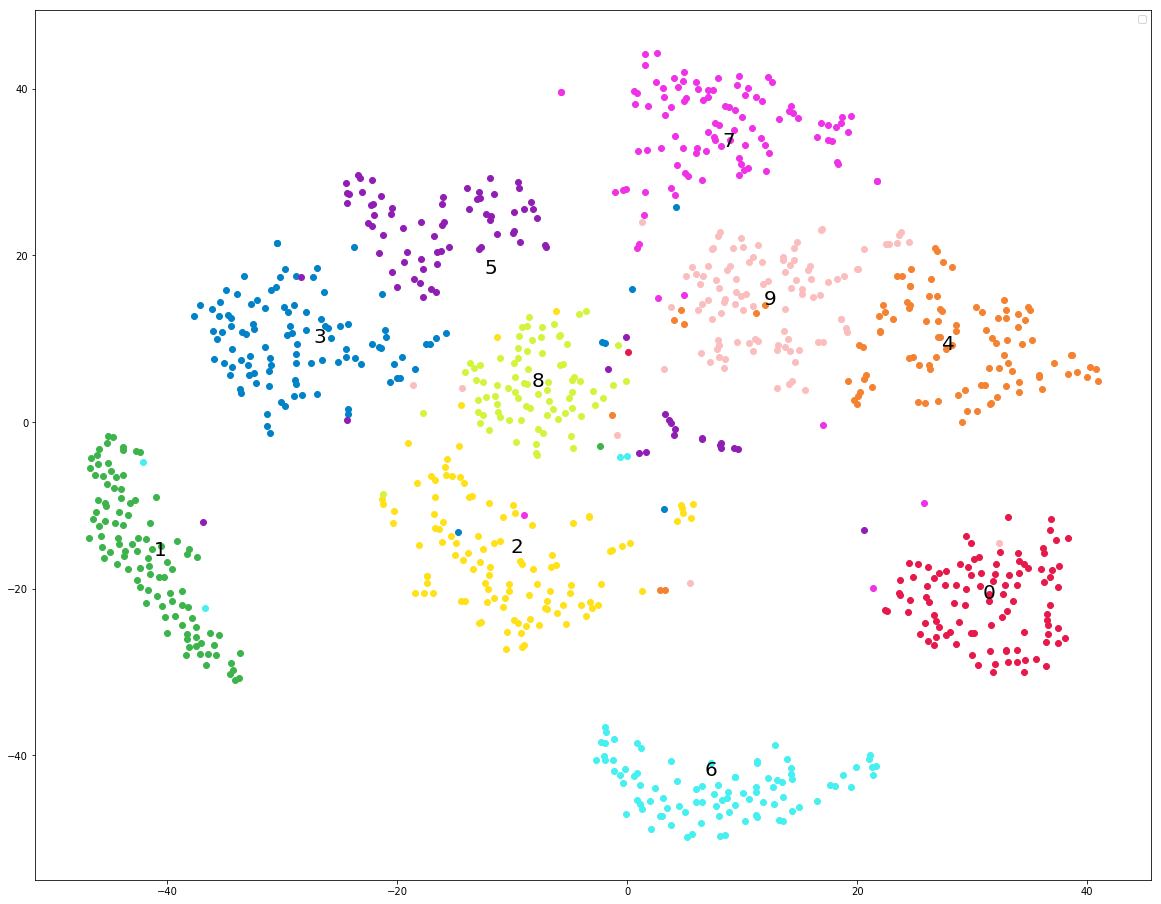

In [21]:
plot_scatter(tsne_first_layer_output, inp_images, out_labels)

### PCA on the first output layer

No handles with labels found to put in legend.


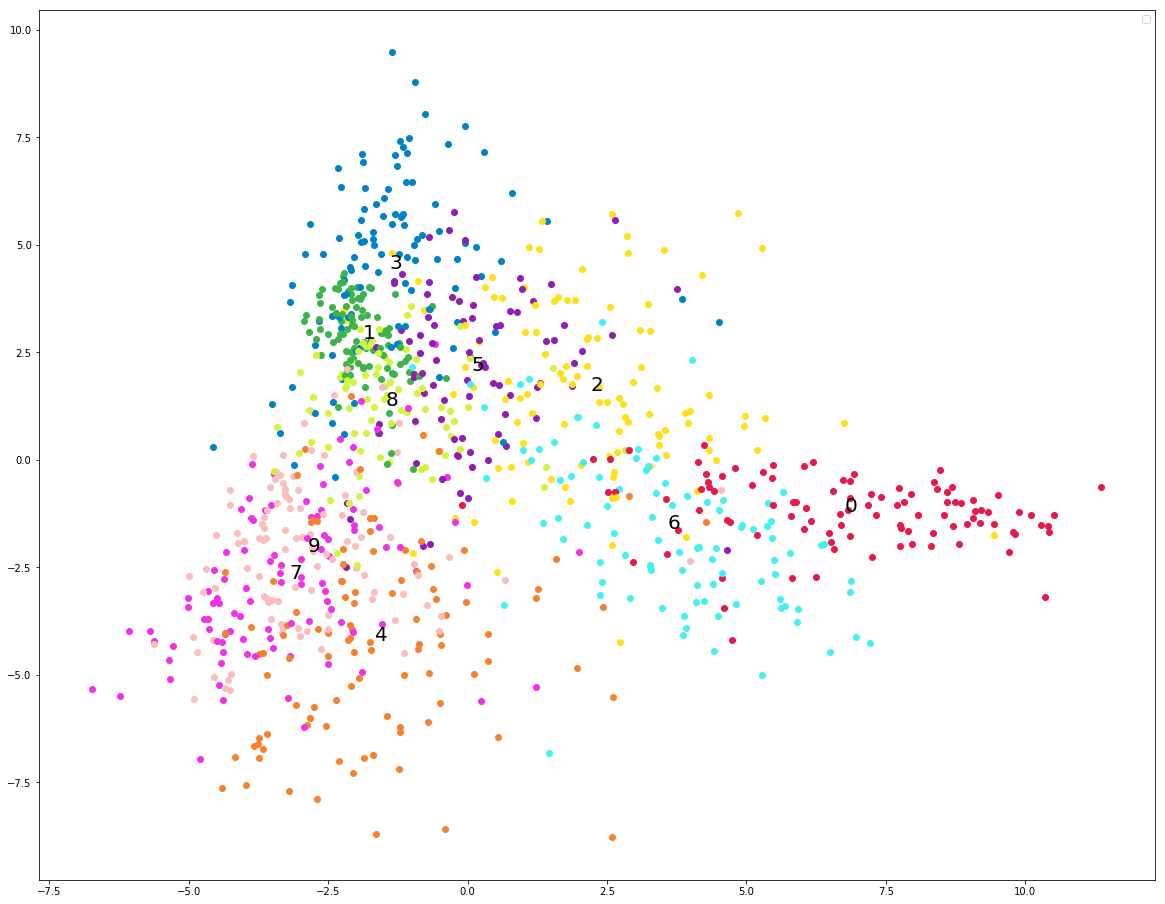

In [22]:
plot_scatter(pca_first_layer_output, inp_images, out_labels)

### T-SNE on the second output layer

No handles with labels found to put in legend.


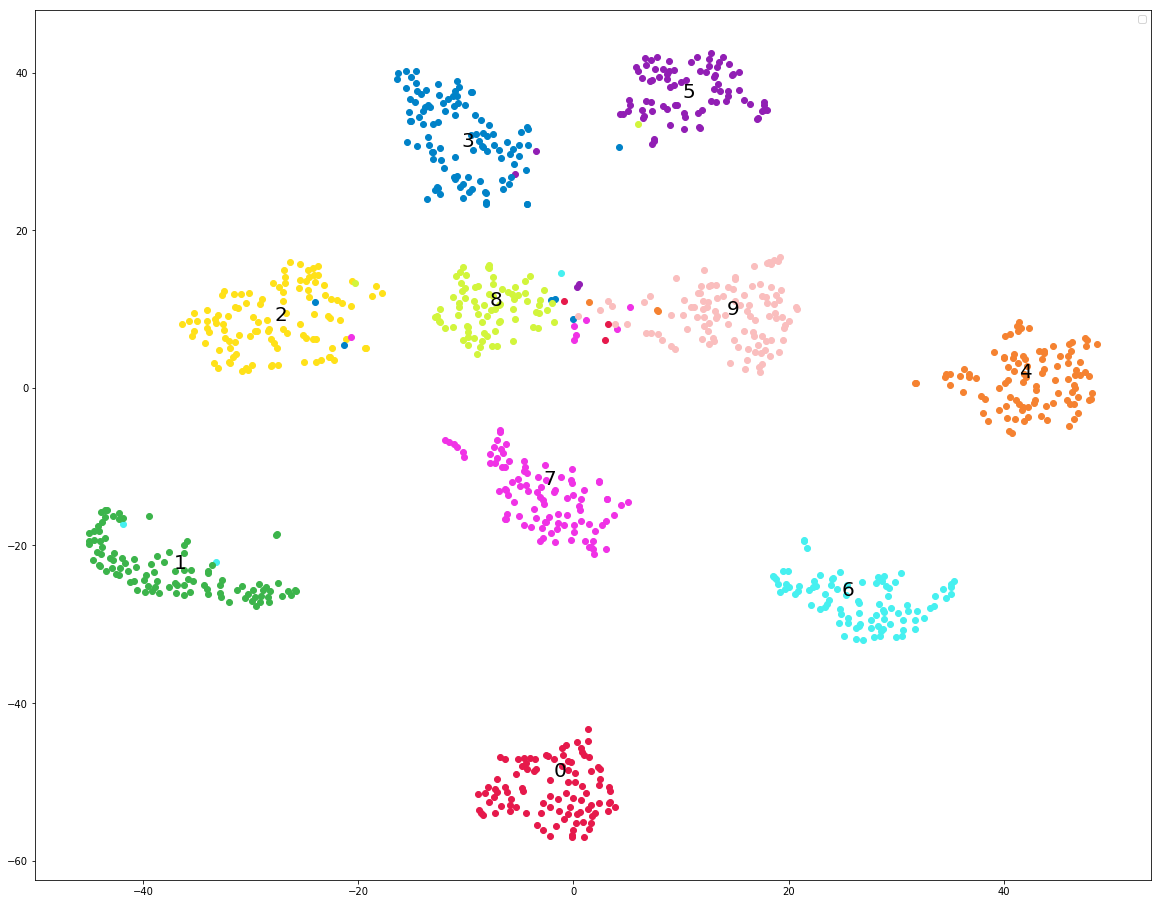

In [23]:
plot_scatter(tsne_second_layer_output, inp_images, out_labels)

### T-SNE on the second output layer

No handles with labels found to put in legend.


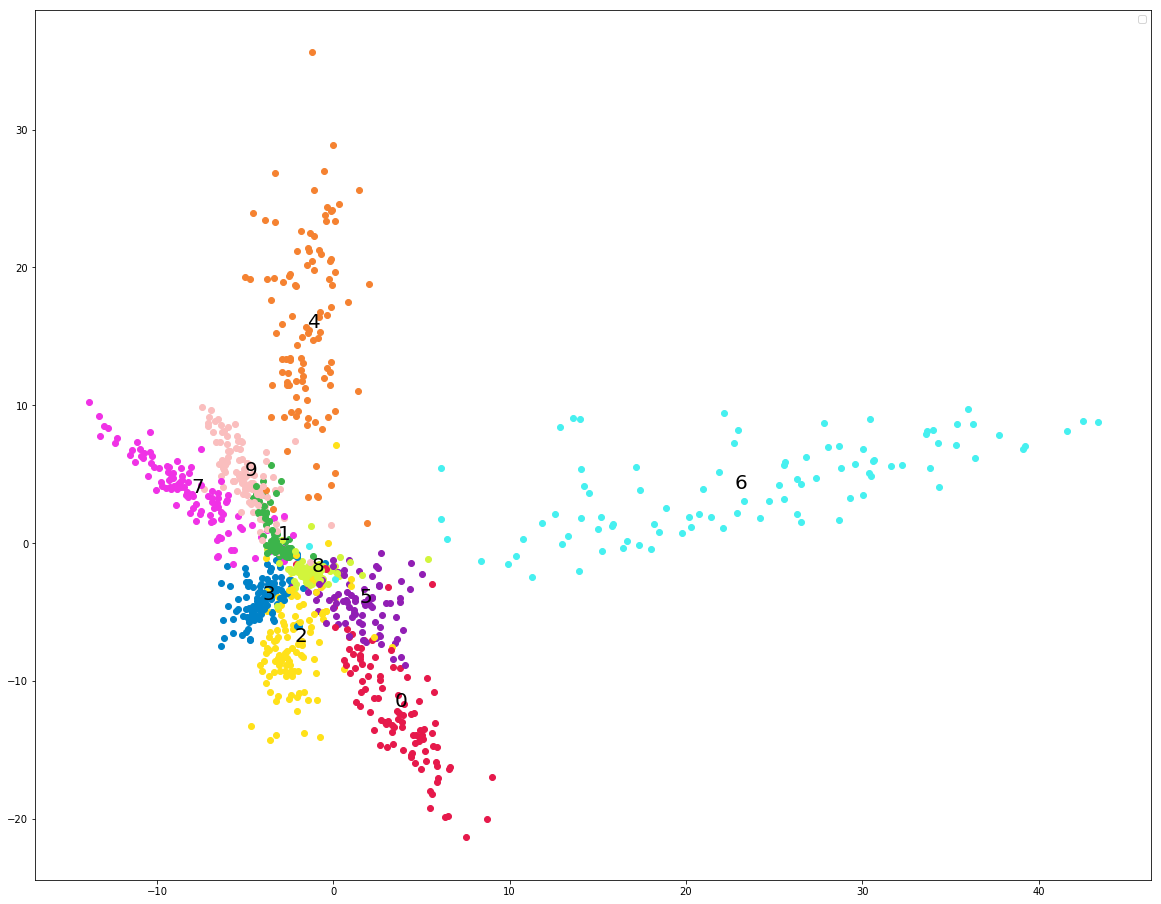

In [24]:
plot_scatter(pca_second_layer_output, inp_images, out_labels)

### T-SNE on the third output layer

No handles with labels found to put in legend.


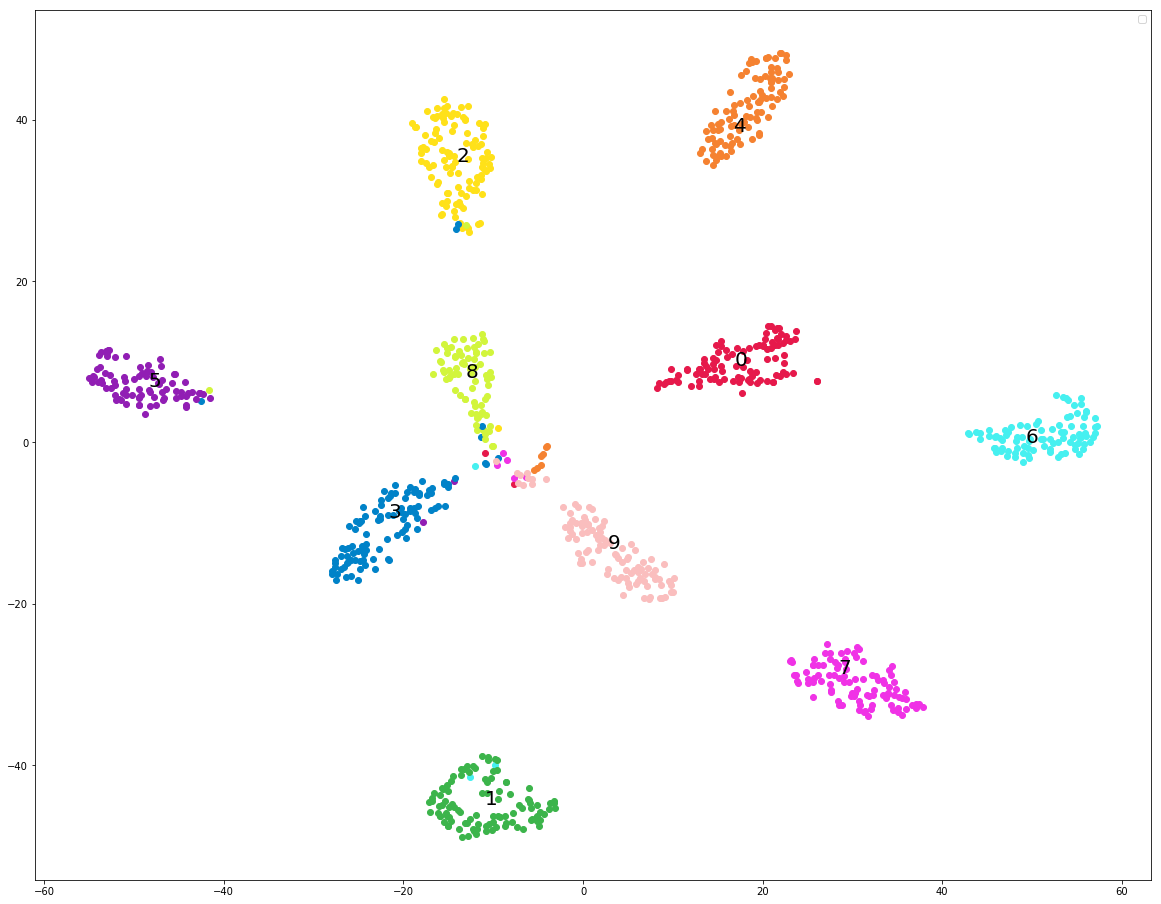

In [25]:
plot_scatter(tsne_third_layer_output, inp_images, out_labels)

### PCA on the third output layer

No handles with labels found to put in legend.


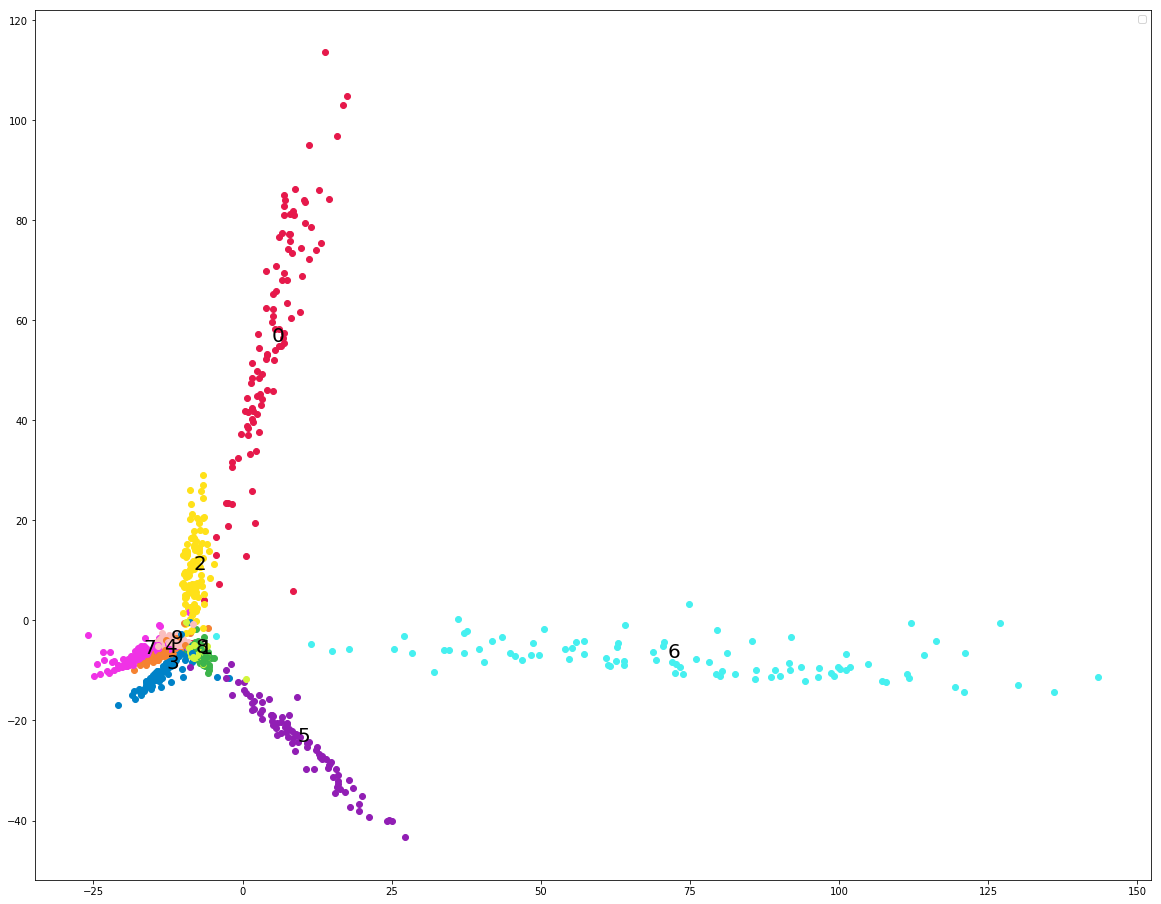

In [26]:
plot_scatter(pca_third_layer_output, inp_images, out_labels)

### T-SNE on the fourth output layer

No handles with labels found to put in legend.


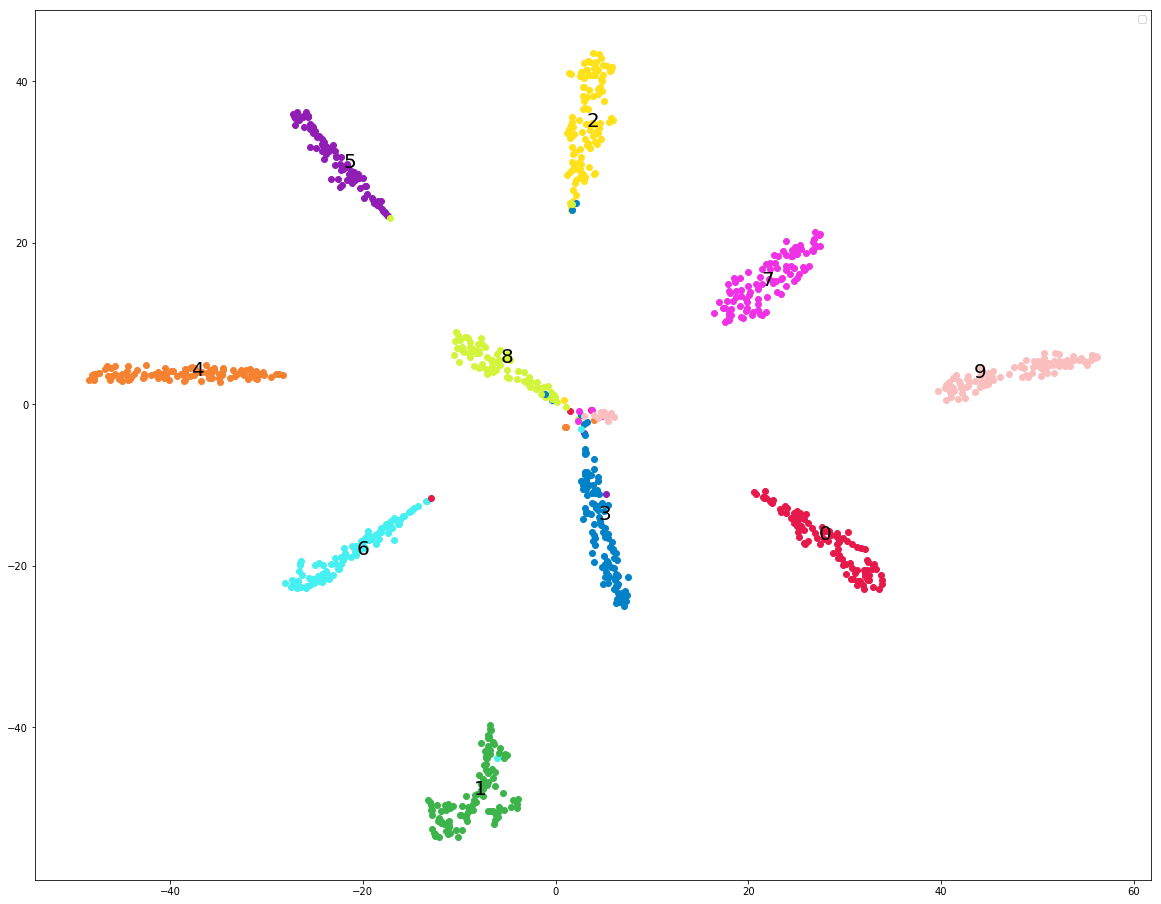

In [27]:
plot_scatter(tsne_fourth_layer_output, inp_images, out_labels)

### PCA on the fourth output layer

No handles with labels found to put in legend.


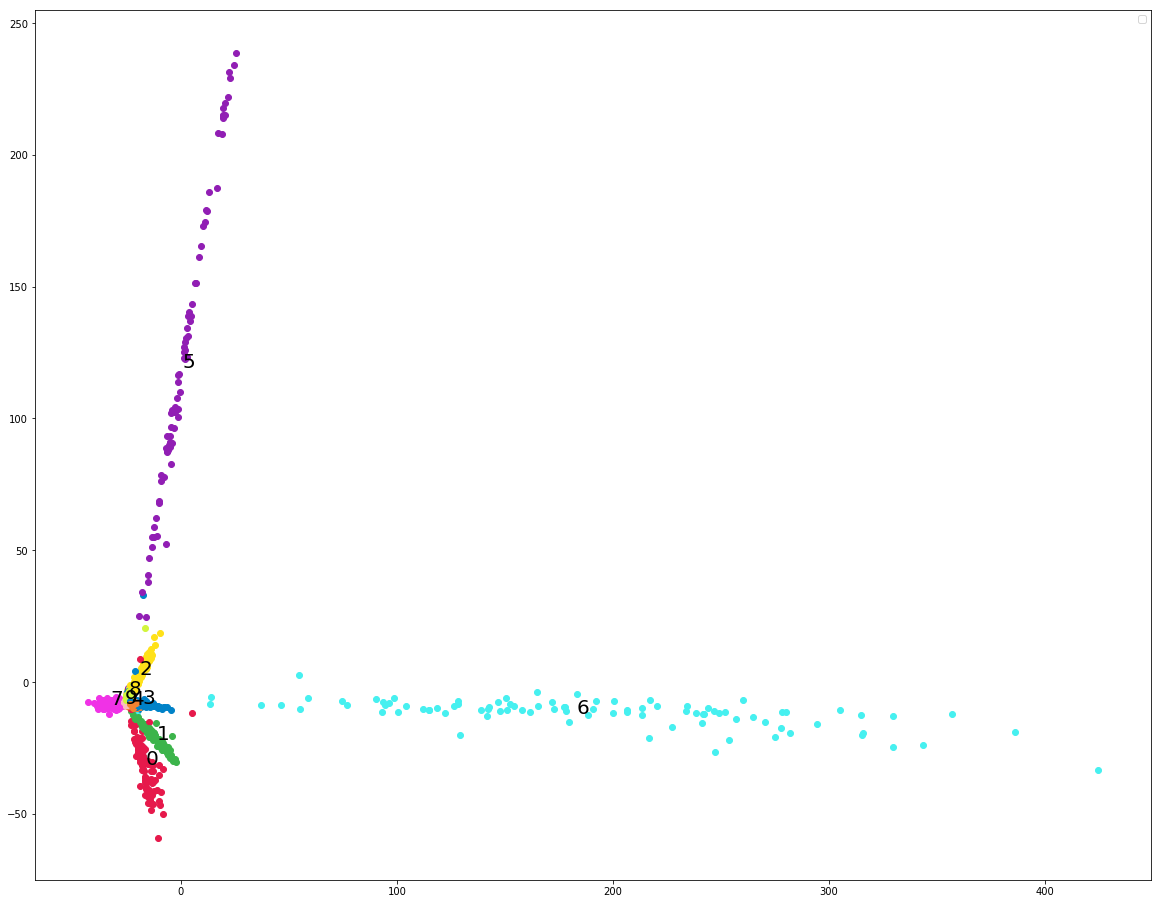

In [28]:
plot_scatter(pca_fourth_layer_output, inp_images, out_labels)

### PCA on the fifth output layer

No handles with labels found to put in legend.


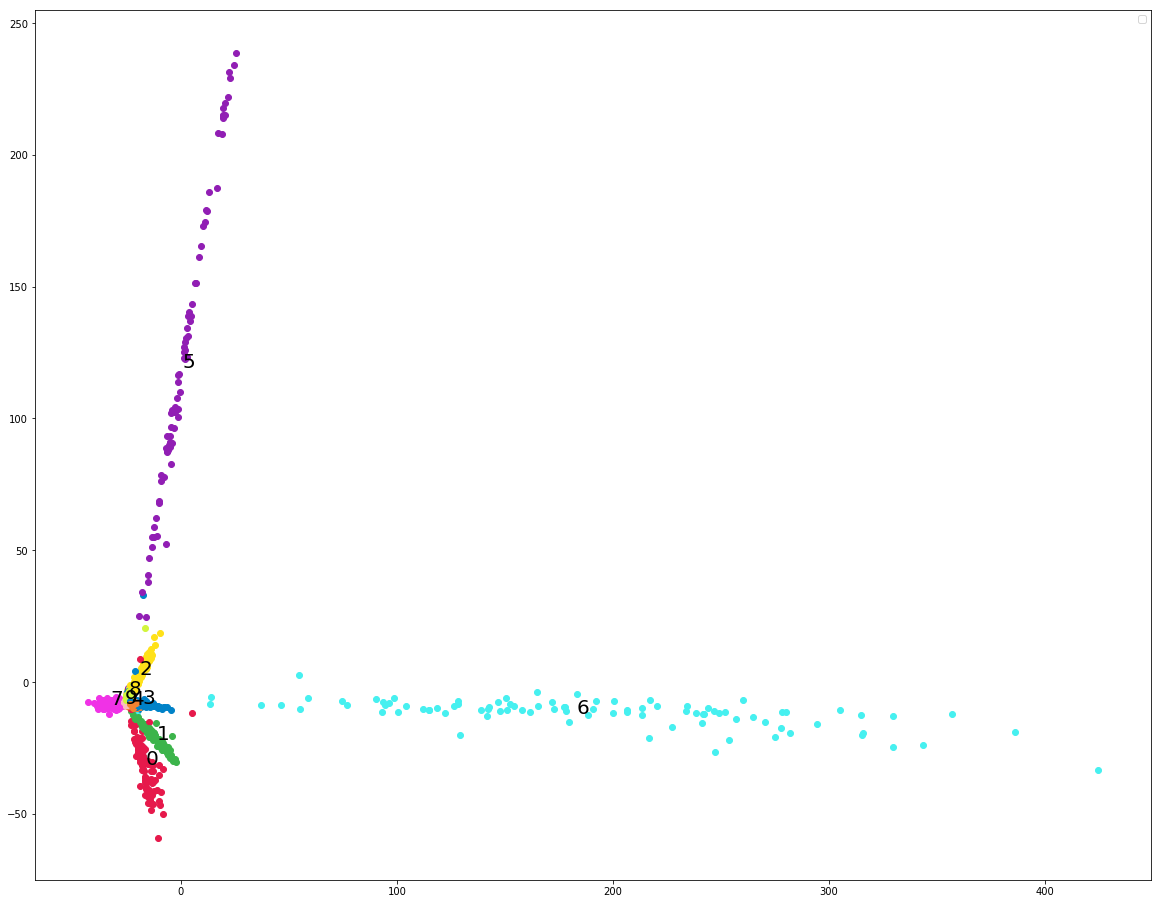

In [29]:
plot_scatter(pca_fifth_layer_output, inp_images, out_labels)

### T-SNE on the fifth output layer

No handles with labels found to put in legend.


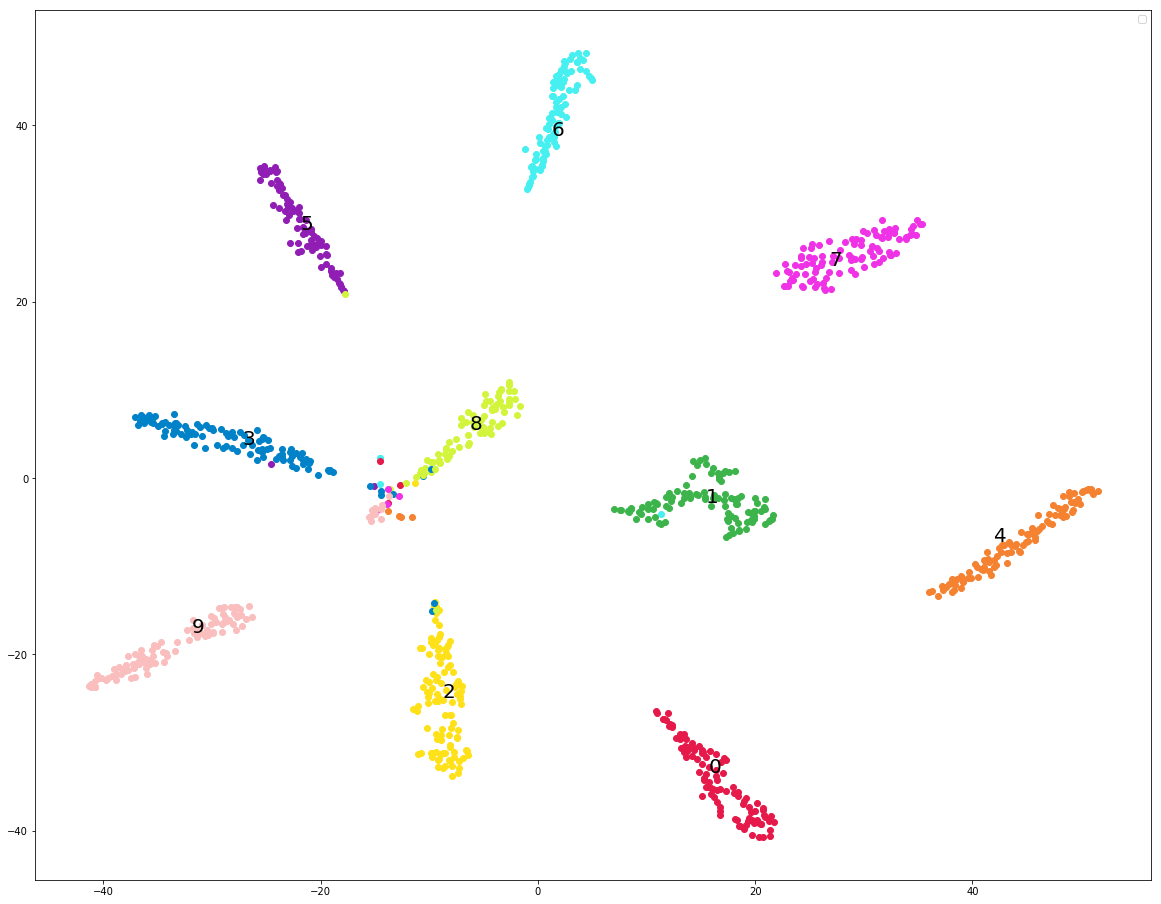

In [30]:
plot_scatter(tsne_fifth_layer_output, inp_images, out_labels)

### Observation

#### Frorm the above plots it is clear that whenever we are going down in the number of layers i.e., the layers close to the output layer has better classification power which is clearly depicted by the above plots.